In [1]:
from routingapp.common.routing_utils import *

In [2]:
link_quality_controller = rq.get('http://0.0.0.0:8080/link_quality').json()
link_quality_mininet = rq.get('http://0.0.0.0:8000/link_quality').json()
link_ping_stat = rq.get('http://0.0.0.0:8000/link_ping_stat').json()

link_ping_stat

[{'src.host': 5,
  'dst.host': 4,
  'packet_loss': 0.09024390243902439,
  'delay': 82.06},
 {'src.host': 4,
  'dst.host': 5,
  'packet_loss': 0.09024390243902439,
  'delay': 82.06},
 {'src.host': 5,
  'dst.host': 6,
  'packet_loss': 0.07804878048780488,
  'delay': 58.072},
 {'src.host': 6,
  'dst.host': 5,
  'packet_loss': 0.07804878048780488,
  'delay': 58.072},
 {'src.host': 1,
  'dst.host': 3,
  'packet_loss': 0.06585365853658537,
  'delay': 138.063},
 {'src.host': 3,
  'dst.host': 1,
  'packet_loss': 0.06585365853658537,
  'delay': 138.063},
 {'src.host': 1,
  'dst.host': 2,
  'packet_loss': 0.06585365853658537,
  'delay': 150.067},
 {'src.host': 2,
  'dst.host': 1,
  'packet_loss': 0.06585365853658537,
  'delay': 150.067},
 {'src.host': 3,
  'dst.host': 4,
  'packet_loss': 0.03902439024390244,
  'delay': 118.064},
 {'src.host': 4,
  'dst.host': 3,
  'packet_loss': 0.03902439024390244,
  'delay': 118.064},
 {'src.host': 1,
  'dst.host': 5,
  'packet_loss': 0.05365853658536585,
  'd

In [3]:
_, graph = get_topo()
host_json = get_host()
link_info = get_link_quality()

NameError: name 'get_link_quality' is not defined

In [ ]:
_, graph = get_topo()
host_json = get_host()
link_info = get_link_info()

# Add host to graph
for host in host_json['hosts']:
    dpid_int = mac_to_int(host['port']['dpid'])
    host_int = mac_to_int(host['mac'])
    # print(f'dpid_int: {dpid_int}, host_int: {host_int}')
    
    # Add node to graph
    graph.add_node(f'h{host_int}', type='host')
    # add bi-directional link between host and switch
    graph.add_edge(f'h{host_int}', dpid_int, type='host')
    graph.add_edge(dpid_int, f'h{host_int}', type='host')

# print graph to json
# print(nx.node_link_data(graph))

# Mapping host h{int} to int
mapping = dict(zip(graph.nodes(), range(1, len(graph.nodes())+1)))
print(mapping)
# Creating adj-matrix of graph
number_node = len(graph.nodes())
bin_matrix = nx.adjacency_matrix(graph).todense()
adj_matrix = [[] for i in range(number_node+1)]
for i in range(1, number_node+1):
    for j in range(1, number_node+1):
        if bin_matrix[i-1][j-1] == 1:
            adj_matrix[i].append(j)

# Get from data from /link_quality
update_delay = []
update_link_utilization = []
update_loss = []
for stat in link_info:
    src = mapping[stat['src.dpid']]
    dst = mapping[stat['dst.dpid']]
    if src != dst:
        delay = stat.get('delay', 0)
        if delay == None: delay = 0
        loss = stat.get('packet_loss', 0)
        if loss == None: loss = 0
        bandwidth = stat.get('link_utilization', 0)
        if bandwidth == None: bandwidth = 0
        update_delay.append((src, dst, delay))
        update_loss.append((src, dst, loss))
        update_link_utilization.append((src, dst, bandwidth))
    
# # Reading request
# routes = task.route
# request = []

# for route in routes:
#     src = f'h{route.src_host}'
#     dst = f'h{route.dst_host}'
#     src = mapping[src]
#     dst = mapping[dst]
#     print('reading rq', src, dst)
#     request.append((src, dst))


{4: 1, 3: 2, 2: 3, 5: 4, 6: 5, 1: 6, 'h6000': 7, 'h2': 8, 'h5000': 9, 'h1000': 10, 'h2000': 11, 'h3000': 12, 'h4000': 13, 'h4': 14, 'h6': 15, 'h5': 16, 'h1': 17, 'h3': 18}


In [ ]:
def link_info_mn_to_hmap():
    '''
        Convert link info from mn func
        "links_info()" into hashmap
    '''
    
    links_info = rq.get('http://0.0.0.0:8000/link_info').json()
    li_map = {}
    for d in links_info:
        key = (d['node1'], d['node2'])
        key2 = (d['node2'], d['node1'])
        li_map[key] = d
        li_map[key2] = d.copy()
        li_map[key2]['node1'], li_map[key2]['node2'] = li_map[key2]['node2'], li_map[key2]['node1']
        li_map[key2]['port1'], li_map[key2]['port2'] = li_map[key2]['port2'], li_map[key2]['port1']
    return li_map
link_info_mn_to_hmap()


{('s1', 'h1'): {'max_queue_size': 1000,
  'use_htb': True,
  'node1': 's1',
  'node2': 'h1',
  'port1': 1,
  'port2': 0},
 ('h1', 's1'): {'max_queue_size': 1000,
  'use_htb': True,
  'node1': 'h1',
  'node2': 's1',
  'port1': 0,
  'port2': 1},
 ('s1', 'h1000'): {'max_queue_size': 1000,
  'use_htb': True,
  'node1': 's1',
  'node2': 'h1000',
  'port1': 2,
  'port2': 0},
 ('h1000', 's1'): {'max_queue_size': 1000,
  'use_htb': True,
  'node1': 'h1000',
  'node2': 's1',
  'port1': 0,
  'port2': 2},
 ('s1', 's2'): {'bw': 117,
  'delay': '14ms',
  'loss': 4,
  'max_queue_size': 1000,
  'use_htb': True,
  'node1': 's1',
  'node2': 's2',
  'port1': 3,
  'port2': 3},
 ('s2', 's1'): {'bw': 117,
  'delay': '14ms',
  'loss': 4,
  'max_queue_size': 1000,
  'use_htb': True,
  'node1': 's2',
  'node2': 's1',
  'port1': 3,
  'port2': 3},
 ('s1', 's3'): {'bw': 137,
  'delay': '88ms',
  'loss': 4,
  'max_queue_size': 1000,
  'use_htb': True,
  'node1': 's1',
  'node2': 's3',
  'port1': 4,
  'port2': 3},

In [ ]:
import requests as rq
from extras.utils import dict_str_to_int_key
import networkx as nx

# Add group atrribute to graph
def get_sw_ctrler_mapping():
    sw_ctrler_mapping_json = rq.get('http://0.0.0.0:8000/sw_ctrler_mapping').json()
    return dict_str_to_int_key(sw_ctrler_mapping_json)
    
get_sw_ctrler_mapping()
graph =  nx.json_graph.node_link_graph(rq.get('http://0.0.0.0:8000/graph').json())

In [ ]:
get_sw_ctrler_mapping()
graph =  nx.json_graph.node_link_graph(rq.get('http://0.0.0.0:8000/graph').json())

def add_group_attribute(G, node_groups):
    for node, data in G.nodes(data=True):
        # print(node, data)
        if node in node_groups:
            print(data, node_groups[node])
            data["controller"] = node_groups[node]
        # else:
        #     # Handle nodes without predefined group membership (optional)
        #     # data["group"] = "unassigned"  # Example handling
        #     pass
    return G

graph = add_group_attribute(graph, get_sw_ctrler_mapping())
graph.nodes(data=True)

{} 1
{} 0
{} 1
{} 0
{} 0
{} 1


NodeDataView({1: {'controller': 1}, 'h1': {}, 'h1000': {}, 2: {'controller': 0}, 3: {'controller': 1}, 5: {'controller': 0}, 'h2': {}, 'h2000': {}, 6: {'controller': 0}, 'h3': {}, 'h3000': {}, 4: {'controller': 1}, 'h4': {}, 'h4000': {}, 'h5': {}, 'h5000': {}, 'h6': {}, 'h6000': {}})

In [ ]:
def get_inter_group_edges(graph: nx.DiGraph):
    '''
        Input: Graph
        Return: inter group edge (adj node)
        bettween 2 parttion by checking attribute 'controller'
        of each node which controller group it belong to
    '''
    group_membership = nx.get_node_attributes(graph, 'controller')
    inter_group_edges = []
    for u, v, data in graph.edges(data=True):
        # I don't like using try catch in this part
        # just to check if group_membership has key
        # hope in the future i can find a way to using
        # a better implement than this
        try:
            if group_membership[u] != group_membership[v]:
                inter_group_edges.append((u, v, data))
        except KeyError:
            pass
    return inter_group_edges

get_inter_group_edges(graph)

AttributeError: 'dict' object has no attribute 'has_key'

In [ ]:
get_sw_ctrler_mapping()

{2: 0, 5: 0, 6: 0, 1: 1, 3: 1, 4: 1}

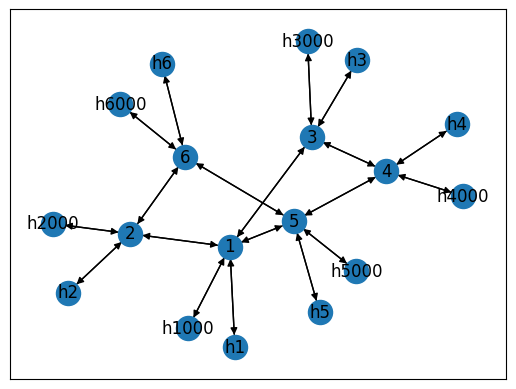

In [ ]:
import matplotlib.pyplot as plt
nx.draw_networkx(graph)

In [ ]:
# Will be replacement for get_link_quality
import requests as rq
'''
    Get from data from /link_quality
    currently working as a workaround 
    for link utilization
'''

link_quality_controllers = rq.get(f'http://0.0.0.0:{8080+i}/link_quality').json()


link_quality_mininet = link_info_mn_to_hmap()
link_ping_stat = rq.get(f'http://0.0.0.0:8000/link_ping_stat').json()

lqc_hmap = {}
lqm_hmap = {}
lps_hmap = {}

# for d in link_quality_controller:
#     key = (d['src.dpid'], d['dst.dpid'])
#     lqc_hmap[key] = d

for d in link_quality_mininet:
    key = (d['src.dpid'], d['dst.dpid'])
    lqm_hmap[key] = d

for d in link_ping_stat:
    key = (d['src.host'], d['dst.host'])
    lps_hmap[key] = d

link_quality = []
for key, lqm_value in lqm_hmap.items():
    lqm_value = lqm_hmap.get(key)
    lps_value = lps_hmap.get(key)
    if lqm_value == None: continue  
    link_quality.append({
        'src.dpid': key[0],
        'dst.dpid': key[1],
        'packet_loss': lps_value.get('packet_loss', None),
        'delay': lps_value.get('delay', None),
        'bandwidth': lqm_value.get('bandwidth', 1),
        # 'link_usage': lqc_value.get('link_usage', 0),
        # 'link_utilization': lqc_value.get('link_usage', 0) / lqm_value.get('bandwidth', 1) * 100,
    })
    


KeyError: 'src.dpid'

In [ ]:
a: list[tuple] = [(1,2), (3,4)]

In [ ]:
def dict_str_to_int_key(str_key_dict: dict):
    '''
        convert
    '''
    int_key_dict = {}
    for key, value in str_key_dict.items():
        int_key_dict[int(key)] = value
    return int_key_dict

In [ ]:
import requests as rq
sw_ctrler_mapping_json = rq.get('http://0.0.0.0:8000/sw_ctrler_mapping').json()
dict_str_to_int_key(sw_ctrler_mapping_json)


{2: 0, 5: 0, 6: 0, 1: 1, 3: 1, 4: 1}